In [1]:
import copy
import os
import pathlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
from drmdp import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/drmdp/workflows/bayesleastjob/agg/1746522508/1746526729/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files, reader="pd")

In [6]:
df_metrics.iloc[0]["meta"]["env_spec"]

{'args': {'constraint_violation_reward': 0.0,
  'max_episode_steps': 200.0,
  'penalty_gamma': 1.0,
  'reward_fn': 'pos-enf'},
 'feats_spec': {'args': {'tiling_dim': 3.0}, 'name': 'tiles'},
 'name': 'Finite-CC-ShuntDc-v0'}

In [7]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,110,1746522508-076ae031-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[376.71721864690574, 376.92768071731865, 374.3...","{'returns': {'mean': 353.99251763539837, 'std'...",LEAST-BFA
1,110,1746522508-0338bf65-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[244.12537941320352, 263.4672378366947, 266.04...","{'returns': {'mean': 246.17451795695695, 'std'...",LEAST-BFA
2,110,1746522508-084fac34-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[241.64200008835107, 229.91549583970968, 232.3...","{'returns': {'mean': 214.1505033634004, 'std':...",LEAST-BFA
3,110,1746522508-1924cdf4-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[186.6867093270395, 375.1745452660158, 373.331...","{'returns': {'mean': 253.708477520613, 'std': ...",LEAST-BFA
4,110,1746522508-0a7a4d55-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[159.1375096990118, 226.10194015868544, 224.25...","{'returns': {'mean': 190.4459719194082, 'std':...",LEAST-BFA
...,...,...,...,...,...,...
229,480,1746522508-df57cd40-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[-20.634095634095633, -21.033264033264032, -22...","{'returns': {'mean': -22.64241164241164, 'std'...",LEAST-BFA
230,480,1746522508-f6c70365-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[-8.746361746361746, -8.79002079002079, -8.875...","{'returns': {'mean': -8.836590436590436, 'std'...",LEAST-BFA
231,480,1746522508-dd2e9f66-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[-8.781704781704782, -8.956340956340956, -8.76...","{'returns': {'mean': -8.843659043659043, 'std'...",LEAST-BFA
232,480,1746522508-ee4a5c3a-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174652250...","[-8.446985446985448, -8.424116424116423, -8.45...","{'returns': {'mean': -8.452113652113653, 'std'...",LEAST-BFA


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1746522508-076ae031-Finite-CC-ShuntDc-v0',
 'instance_id': 12,
 'run_config': {'episodes_per_run': 1000,
  'log_episode_frequency': 10,
  'num_runs': 15,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/bayesleastjob/logs/1746522508/1746522508-076ae031-Finite-CC-ShuntDc-v0/run_12/least-bayes-lfa/65aae67c',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': 0.0,
   'max_episode_steps': 200.0,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': {'tiling_dim': 3.0}, 'name': 'tiles'},
  'name': 'Finite-CC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': {'args': {'delay': 2.0}, 'name': 'fixed'},
  'epsilon': 0.2,
  'gamma': 1.0,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': {'feats_spec': {'args': None, 'name': 'scale'},
    'init_update_episodes': 100.0,
    'mode': 'double',
    

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, spec in sorted(envs.items()):
    print(env_name, spec)

Finite-CC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
GridWorld-v0 {'constraint_violation_reward': None, 'max_episode_steps': 200.0, 'penalty_gamma': None, 'reward_fn': None}
IceWorld-v0 None
MountainCar-v0 {'constraint_violation_reward': None, 'max_episode_steps': 2500.0, 'penalty_gamma': None, 'reward_fn': None}
RedGreen-v0 None


In [11]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)
    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc
    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [12]:
def parse_algorithm(meta):
    spec = meta["problem_spec"]["reward_mapper"]
    if spec:
        if spec["name"] == "least-bayes-lfa":
            mode = "fixed" if spec["args"]["mode"] == "interval" else "sd"
            init_update_episodes = spec["args"]["init_update_episodes"]
            return f"{mode}({init_update_episodes})"
    return None

In [13]:
def create_returns_plotting_data(
    df_data: pd.DataFrame,
):
    df_result = copy.deepcopy(df_data)
    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result["variant"] = df_result["meta"].apply(parse_algorithm)
    rows = []
    for row in df_result.to_dict("records"):
        if row["variant"]:
            row["method"] = f"{row['method']}({row['variant']})"
        rows.append(row)
    df_result = pd.DataFrame(rows)
    # drop FR
    df_result = df_result[df_result["method"].apply(lambda el: "LEAST-BFA" in el)]
    del df_result["meta"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    
    # agg returns
    df_result["mean_returns"] = df_result["returns"].apply(lambda returns: np.mean(returns))
    return {"sarsa": df_result}  

In [14]:
df_returns_curves = create_returns_plotting_data(df_metrics)

{'delay_type': 'fixed', 'delay_mu': 2.0}
{'delay_type': 'fixed', 'delay_mu': 4.0}
{'delay_type': 'fixed', 'delay_mu': 8.0}
{'delay_type': 'fixed', 'delay_mu': 6.0}


In [15]:
df_returns_curves["sarsa"]

,episode,exp_id,returns,metrics,method,gamma,env_name,env_args,feats_name,feats_args,variant,delay_type,delay_mu,mean_returns
1,110,1746522508-0338bf65-Finite-TC-PermExDc-v0,"[244.12537941320352, 263.4672378366947, 266.04...","{'returns': {'mean': 246.17451795695695, 'std'...",LEAST-BFA(sd(10.0)),1.00,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},sd(10.0),fixed,2.0,246.174518
19,110,1746522508-09204910-MountainCar-v0,"[-329.5855855855856, -329.1621621621622, -332....","{'returns': {'mean': -335.2396396396397, 'std'...",LEAST-BFA(sd(10.0)),0.99,MountainCar-v0,"{'constraint_violation_reward': None, 'max_epi...",tiles,{'tiling_dim': 6.0},sd(10.0),fixed,2.0,-335.239640
24,110,1746522508-213529a5-Finite-CC-PermExDc-v0,"[148.51424996740468, 243.27648799705185, 240.1...","{'returns': {'mean': 226.00480004126408, 'std'...",LEAST-BFA(sd(10.0)),0.99,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 4.0},sd(10.0),fixed,2.0,226.004800
75,110,1746522508-623529fa-Finite-TC-PermExDc-v0,"[49.92105587148813, 321.516684178443, 368.4481...","{'returns': {'mean': 259.98773161277853, 'std'...",LEAST-BFA(sd(10.0)),0.99,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},sd(10.0),fixed,2.0,259.987732
77,110,1746522508-671b24c7-Finite-CC-ShuntDc-v0,"[295.7645153015699, 209.69861710627555, 275.10...","{'returns': {'mean': 303.08125122858564, 'std'...",LEAST-BFA(sd(10.0)),1.00,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},sd(10.0),fixed,2.0,303.081251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584948,480,1746522508-2ea18ab6-IceWorld-v0,"[-39.75675675675676, -26.683991683991685, -27....","{'returns': {'mean': -38.22203742203742, 'std'...",LEAST-BFA(sd(50.0)),1.00,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},sd(50.0),fixed,8.0,-38.222037
584952,480,1746522508-d42aaab7-MountainCar-v0,"[-208.45945945945945, -207.53846153846155, -21...","{'returns': {'mean': -208.92376992376992, 'std...",LEAST-BFA(sd(50.0)),0.99,MountainCar-v0,"{'constraint_violation_reward': None, 'max_epi...",tiles,{'tiling_dim': 6.0},sd(50.0),fixed,8.0,-208.923770
584955,480,1746522508-e87f564b-GridWorld-v0,"[-98.03742203742203, -76.34927234927235, -109....","{'returns': {'mean': -92.6026334026334, 'std':...",LEAST-BFA(sd(50.0)),1.00,GridWorld-v0,"{'constraint_violation_reward': None, 'max_epi...",tiles,{'tiling_dim': 8.0},sd(50.0),fixed,8.0,-92.602633
584956,480,1746522508-eb0ec02a-Finite-CC-ShuntDc-v0,"[373.1874204689557, 375.1587914407207, 376.449...","{'returns': {'mean': 370.8433387804224, 'std':...",LEAST-BFA(sd(50.0)),0.99,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},sd(50.0),fixed,8.0,370.843339


In [16]:
df_returns_curves["sarsa"]["method"].unique()

array(['LEAST-BFA(sd(10.0))', 'LEAST-BFA(sd(100.0))',
       'LEAST-BFA(sd(50.0))'], dtype=object)

In [17]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [18]:
MARKERS = ["s", "p", "o", "P", "X", "d"]

In [19]:
DASHES = {
    "FR": (1, 0),
    "LEAST-BFA(fixed)": (2, 1),
    "LEAST-BFA(sd)": (2, 2),
}

In [20]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["FR", "LEAST-BFA(fixed)", "LEAST-BFA(sd)"],
        sns.color_palette()
    )
}

In [21]:
sorted(df_returns_curves["sarsa"]["env_name"].unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'GridWorld-v0',
 'IceWorld-v0',
 'MountainCar-v0',
 'RedGreen-v0']

In [22]:
SHORT_NAMES = {
    "Finite-CC-PermExDc-v0": "CC-PermExDc",
    "Finite-CC-ShuntDc-v0": "CC-ShuntDc",
    "Finite-SC-PermExDc-v0": "SC-PermExDc",
    "Finite-SC-ShuntDc-v0": "SC-ShuntDc",
    "Finite-TC-PermExDc-v0": "TC-PermExDc",
    "GridWorld-v0": "GW",
    "IceWorld-v0": "IW",
    "MountainCar-v0": "MC",
    "RedGreen-v0": "RGS",
}

In [23]:
def plot_eval_result(
    env: str,
    gamma: float,
    df_data: pd.DataFrame,
    suffix: str,    
    max_episode: int = np.inf,
    max_reward_period: int = 8,
    output_dir: str = "figures/bayesablation"
):
    # TODO: delay types
    df_data = df_data[suffix]
    filter_mask = (
        (df_data["env_name"] == env) &
        (df_data["gamma"] == gamma) & 
        (df_data["episode"] <= max_episode) &
        (df_data["delay_mu"] <= max_reward_period)
    )
    df_result = copy.deepcopy(df_data[filter_mask])
    def rename_env(env: str):
        try:
            return SHORT_NAMES[env]
        except KeyError:
            return env
                               
    df_result["name"] = df_result["env_name"].apply(rename_env)
    del df_result["mean_returns"]
    del df_result["exp_id"]
    del df_result["env_args"]

    # limit episodes if too many
    # to avoid OOM
    if df_result["episode"].max() > 1_000 - 10:
        mask = df_result["episode"].apply(
            lambda episode: episode % 100 == 0
        )
        df_result = df_result[mask]

    df_result = df_result.explode("returns")
    df_result = df_result.rename(
        {
            "delay_mu": "P", 
            "episode": "Episode",
            "returns": "Avg Returns",
            "method": "Method",
            "feats_name": "Encoding"
        },
        axis=1
    )
    # split to give flexibility in plotting
    name_prefix = "_".join(
        [str(token) for token in ["rc", env, gamma]]
    )

    facet_grid = sns.relplot(
        data=df_result, x="Episode", y="Avg Returns",
        col="P",
        row="Encoding",
        hue="Method",
        style="Method",
        kind="line",
        # palette=METHODS_PALETTES,
        errorbar="sd",
        height=2,
        # dashes=DASHES
    )
    title_template = ", ".join([f"{rename_env(env)}", "P = {col_name}\nEnc = {row_name}"])
    facet_grid.set_titles(title_template)
    export_figure(facet_grid.figure, os.path.join(output_dir, f"{name_prefix}_{suffix}"))
    plt.show()

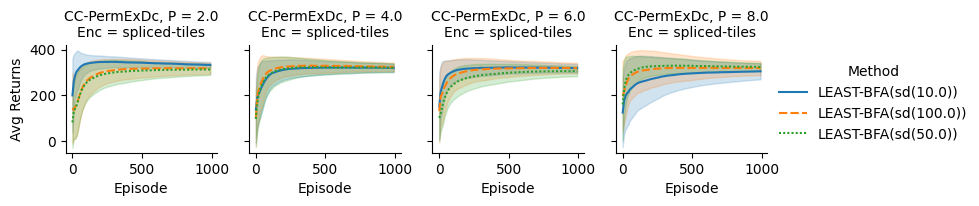

In [24]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

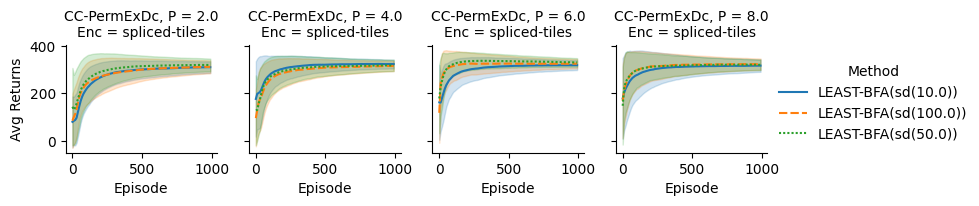

In [25]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

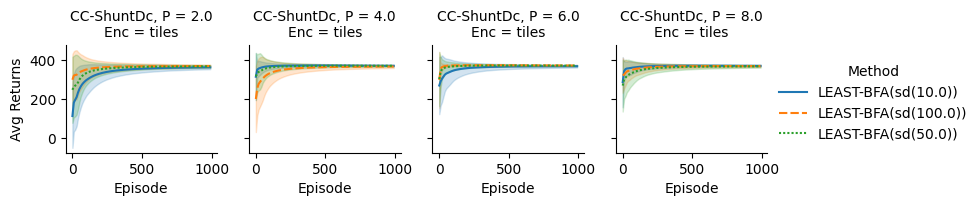

In [26]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

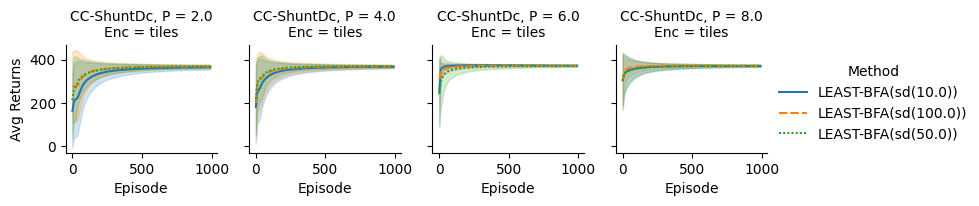

In [27]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

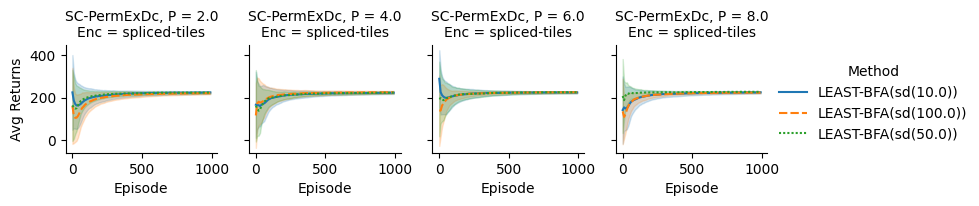

In [28]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

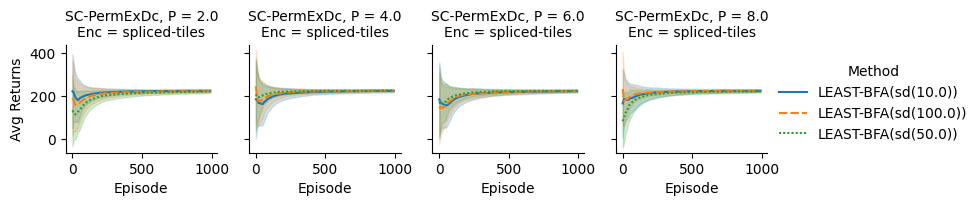

In [29]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

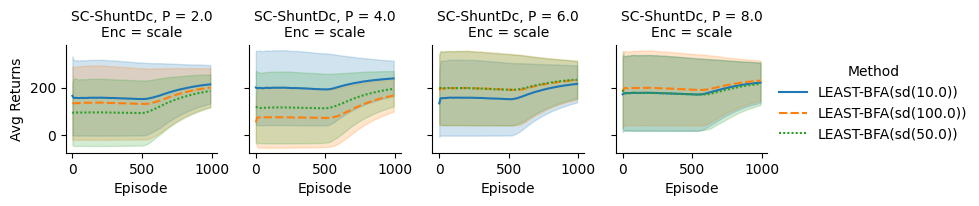

In [30]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

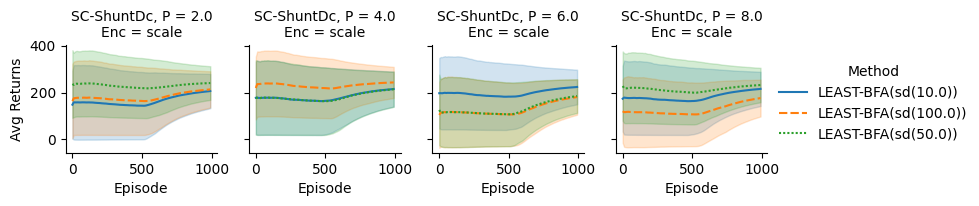

In [31]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

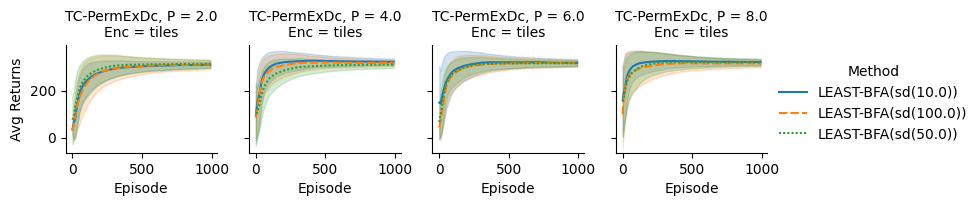

In [32]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

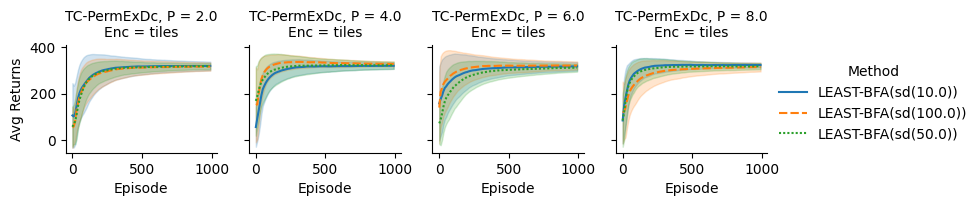

In [33]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

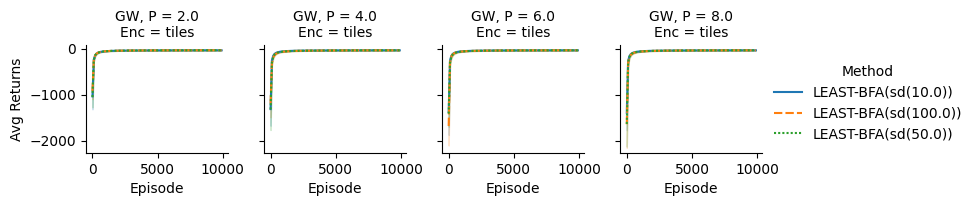

In [34]:
plot_eval_result(
    env="GridWorld-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

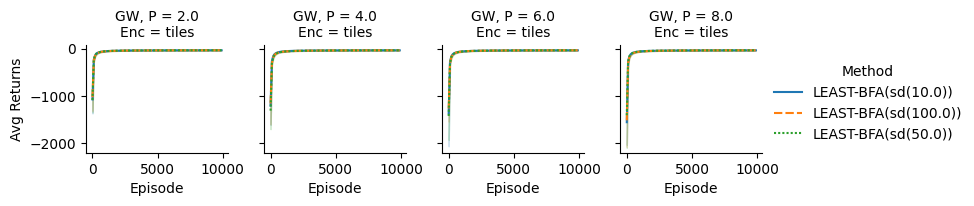

In [35]:
plot_eval_result(
    env="GridWorld-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

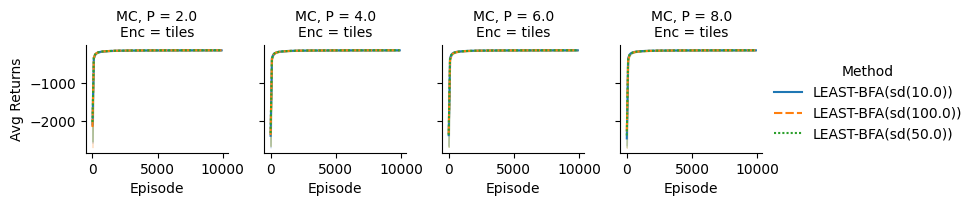

In [36]:
plot_eval_result(
    env="MountainCar-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

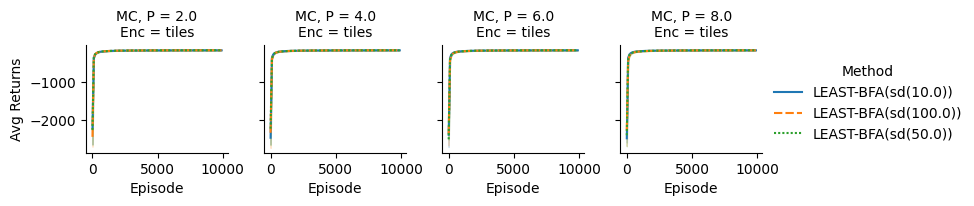

In [37]:
plot_eval_result(
    env="MountainCar-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

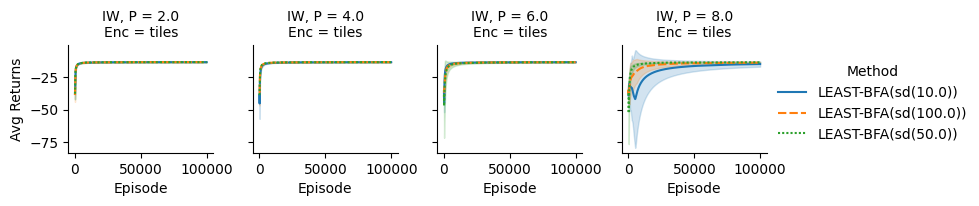

In [38]:
plot_eval_result(
    env="IceWorld-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

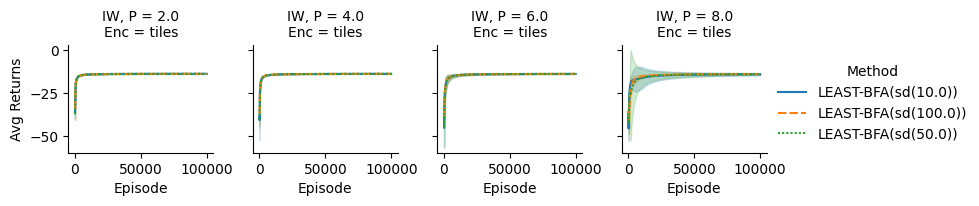

In [39]:
plot_eval_result(
    env="IceWorld-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

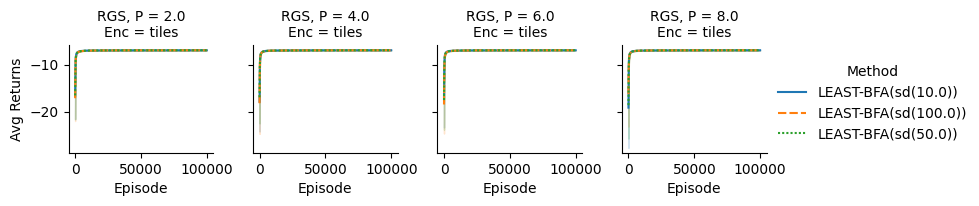

In [40]:
plot_eval_result(
    env="RedGreen-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

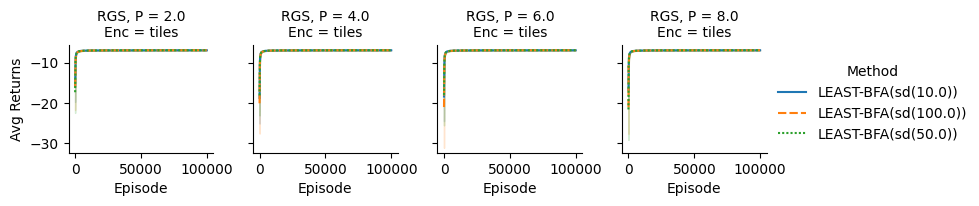

In [41]:
plot_eval_result(
    env="RedGreen-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)